# Predicting Severity of Road Accidents

Group Members:

- Arnav Kamdar
- Ishika Agrawal
- Jennifer Hung
- Mishka Jethwani
- Yashil Vora

One of the leading causes of non natural death is road accidents. There may be several contributing factors that lead to vehicle casualties, including traffic, weather, road conditions etc. We wanted to predict the severity of road accidents ranging from Slight, Serious, to Fatal using supervised models such as Logistic Regression, Decision Trees etc. Attributes that may be used to predict the data include the road conditions, the weather conditions, vehicle types, or what kind of area they’re in. 
 
Our data is mainly focused on locations in the UK, so while it may not necessarily apply similarly in the US, we could still use this model to run on US datasets and see the results. It is a dataset with 14 columns and over 600k observations. Here are the different features that we will be looking at:

- Index
- Accident_Severity
- Accident Date
- Latitude
- Light_Conditions
- District Area
- Longitude
- Number_of_Casualties
- Number_of_Vehicles
- Road_Surface_Conditions
- Road_Type
- Urban_or_Rural_Area
- Weather_Conditions
- Vehicle_Type

Ethical concerns include if our stakeholders were vehicle companies, would they have reduced sales if, say, trucks were more likely to lead to severe accidents? However, by figuring out what would predict the severity of road accidents, we can also prevent harm by noting the features that largely impact the severity.

In [4]:
pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 5.9 MB/s eta 0:00:00ta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
! git clone https://github.com/yashilvoraa19/accident_severity_prediction.git

fatal: destination path 'accident_severity_prediction' already exists and is not an empty directory.


In [6]:
# import libraries, other imports are as we go through encoding
import pandas as pd
import numpy as np
import seaborn as sns

In [7]:
accident = pd.read_csv('accident_severity_prediction/accident_data.csv')
accident.head()

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05-06-2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02-07-2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03-09-2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle


In [8]:
accident.columns

Index(['Index', 'Accident_Severity', 'Accident Date', 'Latitude',
       'Light_Conditions', 'District Area', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Surface_Conditions',
       'Road_Type', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Vehicle_Type'],
      dtype='object')

## Data Cleaning

We will now do some data cleaning and EDA in order to prepare our data for various machine learning models and get a better understanding of different distributions and patterns. Before looking at every column individually, lets get a general idea of the data.

In [9]:
accident.shape

(660679, 14)

In [10]:
# get all the datatypes
# date is a str
accident.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [11]:
# number of unique values in each column
for col in accident.columns:
  print(f'{col}: {accident[col].nunique()}')

Index: 421020
Accident_Severity: 3
Accident Date: 1461
Latitude: 511618
Light_Conditions: 5
District Area: 422
Longitude: 529766
Number_of_Casualties: 36
Number_of_Vehicles: 19
Road_Surface_Conditions: 5
Road_Type: 5
Urban_or_Rural_Area: 3
Weather_Conditions: 8
Vehicle_Type: 16


In [12]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [13]:
null_counts = accident.isnull().sum()
print(null_counts)

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64


In [14]:
# make a copy of accident dataframe
accident_copy = accident.copy()

In [15]:
# get general idea of min max for the numerical columns (no anomalies)
accident_copy.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


#### Index

This column isn't adding any additional information to our data. Hence, we will remove it from our dataframe.

In [16]:
accident_copy = accident_copy.drop(["Index"], axis=1)

#### Accident_Severity

Since this data is labelled as 'Serious', 'Slight', or 'Fatal', we will replace it with 1,0 or 2 respectively.

In [17]:
# Turning Severity into numbers

to_num = {'Serious': 1, 'Slight': 0 , 'Fatal': 2}
accident_copy['Accident_Severity'] = accident['Accident_Severity'].replace(to_num)

In [18]:
print(accident_copy['Accident_Severity'].value_counts())

Accident_Severity
0    563801
1     88217
2      8661
Name: count, dtype: int64


#### Accident Date

This column is encoded as a string, hence we will split up the day, month and year into 3 seperate columns

In [19]:
# turn dates column into three columns: day, month, year
accident_copy['Day'] = accident['Accident Date'].str.split('-').apply(lambda x: int(x[0]))
accident_copy['Month'] = accident['Accident Date'].str.split('-').apply(lambda x: int(x[1]))
accident_copy['Year'] = accident['Accident Date'].str.split('-').apply(lambda x: int(x[2]))

# Let's drop the data column now
accident_copy = accident_copy.drop('Accident Date', axis=1)

In [20]:
accident_copy

,Accident_Severity,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Day,Month,Year
0,1,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,5,6,2019
1,1,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2,7,2019
2,1,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car,26,8,2019
3,1,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),16,8,2019
4,0,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle,3,9,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,0,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car,18,2,2022
660675,0,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,21,2,2022
660676,0,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,23,2,2022
660677,1,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,23,2,2022


#### Latitude and Longitude

We will look at these features together since they are highly correlated geographically. We have some null values for these features- lets count them!

In [21]:
print("Number of nulls in Latitude: " + str(accident_copy['Latitude'].isnull().sum()))
print("Number of nulls in Longitude: " + str(accident_copy['Longitude'].isnull().sum()))

Number of nulls in Latitude: 25
Number of nulls in Longitude: 26


Since the number of null values are insignificant in comparision to the size of the data, we will remove the rows with the null values for both latitude and longitude.

In [22]:
accident_copy.shape

(660679, 15)

In [23]:
accident_copy = accident_copy.dropna(subset=['Latitude'])
accident_copy = accident_copy.dropna(subset=['Longitude'])
accident_copy.shape

(660653, 15)

Since we have 26 less rows, we can say that the 25 pairs of latitudes and longitudes along with the one additional missing longitude have been removed from our dataframe.

#### Light_Conditions

In [24]:
accident_copy['Light_Conditions'].unique()

array(['Darkness - lights lit', 'Daylight', 'Darkness - lighting unknown',
       'Darkness - lights unlit', 'Darkness - no lighting'], dtype=object)

In [25]:
accident_copy['Light_Conditions'].isnull().sum()

0

In [26]:
# assume NaN for 'Darkness - lighting unknown'
accident_copy['Light_Conditions'] = accident['Light_Conditions'].replace('Darkness - lighting unknown', np.NaN)

Let us now drop the Nan columns and encode the remaining data.

In [27]:
to_num = {
    'Darkness - lights lit':2, 
    'Daylight':3, 
    'Darkness - lights unlit':1, 
    'Darkness - no lighting':0
}
accident_copy = accident_copy.dropna(subset=['Light_Conditions'])
accident_copy['Light_Conditions'] = accident_copy['Light_Conditions'].replace(to_num)
accident_copy['Light_Conditions']

0         2
1         3
3         3
4         2
5         3
         ..
660674    3
660675    0
660676    3
660677    0
660678    3
Name: Light_Conditions, Length: 654169, dtype: int64

In [28]:
accident_copy['Light_Conditions'].value_counts()

Light_Conditions
3    484861
2    129331
0     37435
1      2542
Name: count, dtype: int64

#### District Area

No null values, so no major cleaning here!

In [29]:
# rename District Area so it is consistent in column formatting
accident_copy = accident_copy.rename(columns={'District Area': 'District_Area'})


In [30]:
accident_copy['District_Area'].value_counts()

District_Area
Birmingham            13409
Leeds                  8647
Manchester             6518
Bradford               6057
Westminster            5689
                      ...  
Berwick-upon-Tweed      153
Teesdale                142
Shetland Islands        130
Orkney Islands          116
Clackmannanshire         91
Name: count, Length: 422, dtype: int64

#### Weather_Conditions

In [31]:
# weather conditions seem to have combinations, so we could one hot encode it instead
# the categories include 'Fine', 'High Winds', 'Raining', 'Snowing', 'Fog or mist', 'Other'

# first split up the labels into lists
accident_copy['Weather_Conditions'] = accident['Weather_Conditions'].apply(
    lambda x: ['Fine'] if x == 'Fine no high winds'
    else ['Raining'] if x == 'Raining no high winds'
    else ['Fine', 'High winds'] if x == 'Fine + high winds'
    else ['Raining', 'High winds'] if x == 'Raining + high winds'
    else ['Snowing'] if x == 'Snowing no high winds'
    else ['Fog or mist'] if x == 'Fog or mist'
    else ['Snowing', 'High winds'] if x == 'Snowing + high winds'
    else ['Other'] if x == 'Other'
    else np.NaN
)

In [32]:
accident_copy['Weather_Conditions'].value_counts()

Weather_Conditions
[Fine]                   517183
[Raining]                 79070
[Other]                   16964
[Raining, High winds]      9504
[Fine, High winds]         8495
[Snowing]                  6144
[Fog or mist]              3463
[Snowing, High winds]       869
Name: count, dtype: int64

**We have encoded this data using One Hot Encoding later in the notebook**

#### Vehicle_Type

In [33]:
# assume NaN for 'Data missing or out of range'
accident_copy['Vehicle_Type'] = accident['Vehicle_Type'].replace('Data missing or out of range', np.NaN)

#### Before proceeding forward...

Let's look once again at all the null data. The data cleaning for the next 5 features includes removing all the null data. Let's do this at one go.

In [34]:
# find out the current number of missing values in the dataset
accident_copy.isnull().sum()

Accident_Severity              0
Latitude                       0
Light_Conditions               0
District_Area                  0
Longitude                      0
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      682
Road_Type                   4283
Urban_or_Rural_Area            2
Weather_Conditions         12477
Vehicle_Type                   6
Day                            0
Month                          0
Year                           0
dtype: int64

In [35]:
# drop all NaN values
accident_copy = accident_copy.dropna()
print(f'Before dropping missing values: {accident.shape[0]} rows')
print(f'After dropping missing values: {accident_copy.shape[0]} rows')

Before dropping missing values: 660679 rows
After dropping missing values: 638025 rows


In [36]:
accident_copy

,Accident_Severity,Latitude,Light_Conditions,District_Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Day,Month,Year
0,1,51.506187,2,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,[Fine],Car,5,6,2019
1,1,51.495029,3,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,[Raining],Car,2,7,2019
3,1,51.495478,3,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,[Fine],Bus or coach (17 or more pass seats),16,8,2019
5,1,51.497750,3,Kensington and Chelsea,-0.192556,2,3,Dry,Single carriageway,Urban,[Fine],Car,18,9,2019
6,1,51.501405,3,Kensington and Chelsea,-0.161577,1,2,Dry,Dual carriageway,Urban,[Fine],Van / Goods 3.5 tonnes mgw or under,5,9,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,0,57.374005,3,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,[Fine],Car,18,2,2022
660675,0,57.232273,0,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,[Fine],Car,21,2,2022
660676,0,57.585044,3,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,[Fine],Car,23,2,2022
660677,1,57.214898,0,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,[Fine],Motorcycle over 500cc,23,2,2022


## Exploring Data

In this section, we will visualize and analyze our dataset. We have transformed and cleaned up our data, and this should be enough to visualize our data. The encoding that needs to be done for the remaining categorical data will be completed after this step!

##### Pairplot

In [37]:
sns.pairplot(accident_copy)

<Axes: >

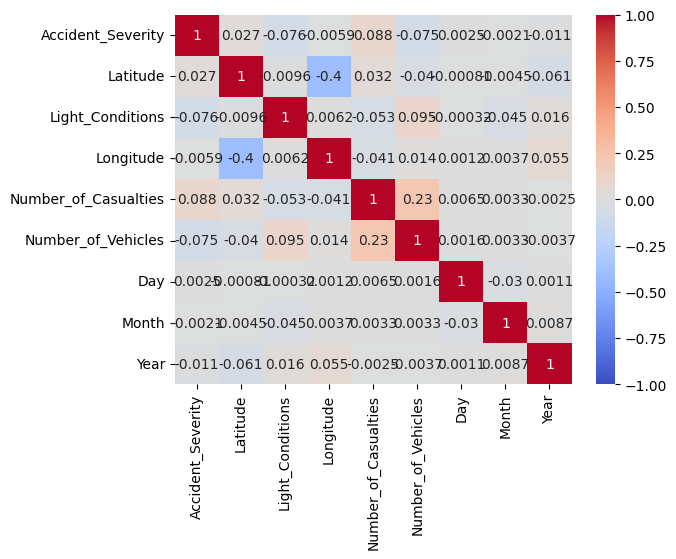

In [38]:
# plot a correlation heatmap to see the correlation between features
# seems like extremely low correlation between Accident Severity and all other columns
# highest is Number of Casualties, at 0.088
sns.heatmap(accident_copy.select_dtypes(include=['float64', 'int64']).corr(), vmin=-1, vmax=1, center=0, annot=True, cmap= 'coolwarm')

Latitude and Longitude have a clear relation since together they plot the map of UK. This is why this also have a string correlation in the heatmap. Apaer from that, there seems to be correlations between accident severity and features such as number of vehicles, number of casualties, and light conditions.

/var/folders/s2/tkp8pnns07s3twv1n0tv232c0000gn/T/ipykernel_34110/2752776326.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Light_Conditions', data=accident, palette='pastel')


NameError: name 'plt' is not defined

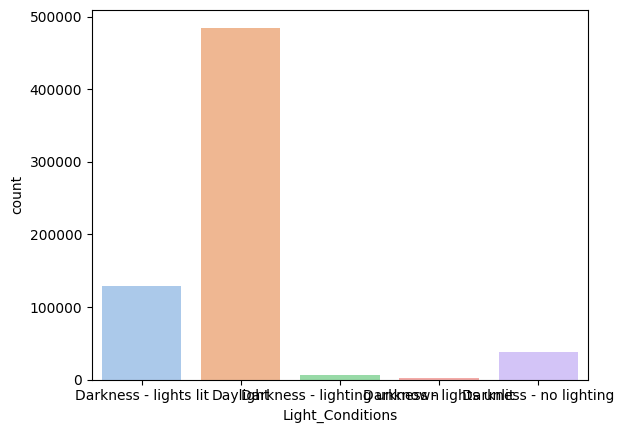

In [39]:
sns.countplot(x='Light_Conditions', data=accident, palette='pastel')
plt.xlabel('Light Conditions')
plt.ylabel('Count')
plt.title('Count of Accidents by Light Conditions')
plt.xticks(rotation=45)
plt.show()

Intuitively, we would have thought that a lot of accidents happen during the darkness. However, through this barplot, this is false. The maximum number of accidents happen in the daylight. A possible reason for this could be that drivers are more reckless and speed more during when there is daylight, but are more careful in the dark. 

In [ ]:
accident_copy['Date'] = pd.to_datetime(accident_copy[['Year', 'Month', 'Day']])

# Group by date and count the number of accidents
accidents_by_date = accident_copy.groupby('Date').size()

# Plot the number of accidents over time
plt.figure(figsize=(10, 6))
accidents_by_date.plot()
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents Over Time')
plt.grid(True)
plt.show()

## Encoding

In [ ]:
# Use One Hot Encoder on all categorical columns that haven't been transformed into numerical data
from sklearn.preprocessing import OneHotEncoder
# categorical columns include Light_Conditions, District_Area,
# Road_Surface_Conditions, Road_Type,	Urban_or_Rural_Area,
# Weather_Conditions, Vehicle_Type

categorical = ['Road_Surface_Conditions', 'Road_Type',	'Urban_or_Rural_Area', 'Vehicle_Type']

for col in categorical:
  ohe = OneHotEncoder()
  categorical_ohe = ohe.fit_transform(accident_copy[[col]]).toarray()
  df = pd.DataFrame(categorical_ohe, columns=list(ohe.categories_[0]))
  print(df)

In [ ]:
# use MultiLabelBinarizer on Weather_Conditions since it can have more than one category
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
weather = mlb.fit_transform(accident_copy['Weather_Conditions'])
# one for everything that was in the weather condition that day
pd.DataFrame(weather, columns=mlb.classes_)

# TO DO- WE NEED TO CONCAT THE ENCODED DATA WITH OUR DATAFRAME + NORMALIZE THE DATA. WHAT IS STANDARDIZATION VS NORMALIZATION? CAN WE DO IMPUTATION? ALSO WHEREVER WE DID LABEL ENCODING SHOULD WE CALL IT THAT AND SHIFT IT TO THE END OF THE NOTEBOOK UNDER THE "ENCODING" SECTION?

### Normalization

In [85]:
accident_copy

,Accident_Severity,Latitude,Light_Conditions,District_Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Day,Month,Year,Date
0,1,51.506187,2,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,[Fine],Car,5,6,2019,2019-06-05
1,1,51.495029,3,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,[Raining],Car,2,7,2019,2019-07-02
3,1,51.495478,3,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,[Fine],Bus or coach (17 or more pass seats),16,8,2019,2019-08-16
5,1,51.497750,3,Kensington and Chelsea,-0.192556,2,3,Dry,Single carriageway,Urban,[Fine],Car,18,9,2019,2019-09-18
6,1,51.501405,3,Kensington and Chelsea,-0.161577,1,2,Dry,Dual carriageway,Urban,[Fine],Van / Goods 3.5 tonnes mgw or under,5,9,2019,2019-09-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,0,57.374005,3,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,[Fine],Car,18,2,2022,2022-02-18
660675,0,57.232273,0,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,[Fine],Car,21,2,2022,2022-02-21
660676,0,57.585044,3,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,[Fine],Car,23,2,2022,2022-02-23
660677,1,57.214898,0,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,[Fine],Motorcycle over 500cc,23,2,2022,2022-02-23


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 15.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 15.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 9.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [48]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
scaler = MinMaxScaler()

In [51]:
accident_copy.head()

,Accident_Severity,Latitude,Light_Conditions,District_Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Day,Month,Year
0,1,51.506187,2,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,[Fine],Car,5,6,2019
1,1,51.495029,3,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,[Raining],Car,2,7,2019
3,1,51.495478,3,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,[Fine],Bus or coach (17 or more pass seats),16,8,2019
5,1,51.497750,3,Kensington and Chelsea,-0.192556,2,3,Dry,Single carriageway,Urban,[Fine],Car,18,9,2019
6,1,51.501405,3,Kensington and Chelsea,-0.161577,1,2,Dry,Dual carriageway,Urban,[Fine],Van / Goods 3.5 tonnes mgw or under,5,9,2019


In [57]:
longitude = accident_copy['Longitude'].values.reshape(-1, 1)
latitude = accident_copy['Latitude'].values.reshape(-1, 1)

In [63]:
normalised_longitude= scaler.fit_transform(longitude)
normalised_latitude= scaler.fit_transform(latitude)

In [64]:
accident_copy['Longitude'] = normalised_longitude
accident_copy['Latitude'] = normalised_latitudeb

In [65]:
accident_copy

,Accident_Severity,Latitude,Light_Conditions,District_Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Day,Month,Year
0,1,0.146799,2,Kensington and Chelsea,0.787557,1,2,Dry,Single carriageway,Urban,[Fine],Car,5,6,2019
1,1,0.145770,3,Kensington and Chelsea,0.791377,1,2,Wet or damp,Single carriageway,Urban,[Raining],Car,2,7,2019
3,1,0.145811,3,Kensington and Chelsea,0.788242,1,4,Dry,Single carriageway,Urban,[Fine],Bus or coach (17 or more pass seats),16,8,2019
5,1,0.146021,3,Kensington and Chelsea,0.789339,2,3,Dry,Single carriageway,Urban,[Fine],Car,18,9,2019
6,1,0.146358,3,Kensington and Chelsea,0.792677,1,2,Dry,Dual carriageway,Urban,[Fine],Van / Goods 3.5 tonnes mgw or under,5,9,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,0,0.687955,3,Highland,0.436333,2,1,Dry,Single carriageway,Rural,[Fine],Car,18,2,2022
660675,0,0.674884,0,Highland,0.399531,1,1,Frost or ice,Single carriageway,Rural,[Fine],Car,21,2,2022
660676,0,0.707418,3,Highland,0.393771,1,3,Frost or ice,Single carriageway,Rural,[Fine],Car,23,2,2022
660677,1,0.673281,0,Highland,0.397945,1,2,Wet or damp,Single carriageway,Rural,[Fine],Motorcycle over 500cc,23,2,2022


### Conclusion

Initially, we had a look at all our data and analyzed the overall distribution and patterns. Following that, we looked at the individual columns and cleaned up some data while converting other columns to numbers. Once this was done, we were able to plot data visualization graphs before the final step of encoding all the data using One Hot Encoding or MultiLabelBinarizer as needed to input into the machine learning. Normalizing is an important step too since it helps improve the training of our model and its overall accuracy.

Doing all of these steps through this milestone helped us become one with the data and understand different patterns. We were able to see correlations between our input and target variables and came to a lot of interesting conclusions through this milestone. Our data should now be prepared to train on models and we should be able to smoothly proceeed onto the next step of this project.

# Resources used: do we need to include stuff like this? 